In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [2]:
import pandas as pd
df =pd.read_csv("auto_mpg.xls")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [4]:
X_auto=df[['displacement','horsepower','weight','acceleration']]
y_auto=df['mpg']

In [7]:
X_train_a, X_test_a,y_train_a,y_test_a=train_test_split(X_auto,y_auto,test_size=0.2,random_state=42)

In [10]:
#scaling
scaler_a=StandardScaler()
X_train_a_scaled=scaler_a.fit_transform(X_train_a)
X_test_a_scaled=scaler_a.transform(X_test_a)

In [11]:
poly=PolynomialFeatures(degree=2)
X_train_poly=poly.fit_transform(X_train_a_scaled)
X_test_poly=poly.transform(X_test_a_scaled)

In [12]:
lr_poly=LinearRegression()
lr_poly.fit(X_train_poly,y_train_a)
y_pred_poly=lr_poly.predict(X_test_poly)

In [13]:
mse_poly=mean_squared_error(y_test_a,y_pred_poly)
print(f"Auto MPG -Polynomial Regression(degree-2) MSE: {mse_poly:.2f}")

Auto MPG -Polynomial Regression(degree-2) MSE: 16.38


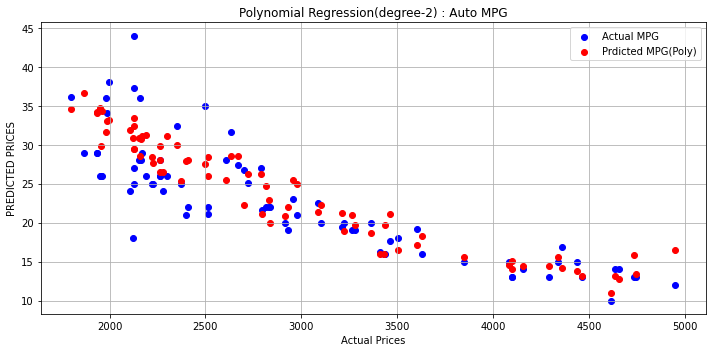

In [28]:
plt.figure(figsize=(10,5))
plt.scatter(X_test_a['weight'],y_test_a,color='blue',label='Actual MPG')
plt.scatter(X_test_a['weight'],y_pred_poly,color='red',label='Prdicted MPG(Poly)')
plt.xlabel('weights')
plt.ylabel('mpg')
plt.title("Polynomial Regression(degree-2) : Auto MPG")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()